# Word Cloud

## Important Steps

- Prepare word frequency data
    - `List`: Word list
    - `dictionary`: Word frequency dictionary

- Determine filtering criteria
    - remove stopwords?
    - remove low-frequency words?

- Chinese font issues
    - Check system-supported Chinese fonts
    
    ```
    !fc-list :lang=zh  
    ```
    
    - Specify the font_path when initialize the `WordCloud`
    

- `WordCloud` Parameters (selective)

```
wc = WordCloud(
    font_path=..., # chinese font path
    width=...,
    height=...,
    margin=...,
    mask=...,
    max_words=...,
    min_font_size=4,
    max_font_size=None,
    stopwords=None, # a set with stopwords
    random_state=None,
    min_word_length=0
```
- Creating the word cloud from data
    - `WordCloud.generate()` expects a text (non-word-segmented long string of texts)
    - `WordCloud.generate_from_frequencies()` expects a dictionary of {word:freq}

- Increase Wordcloud resolution:
    - When intializing the WordCloud, specify the `width` and `heigth`
    - When plotting, specify the figure size of plt:
    ```
    plt.figure(figsize=(20,10), facecolor='k')
    ```
- Create a image-masked word cloud
    - Prepare a jpg of the mask (the white background will mask the words)

```
import imageio
from wordcloud import WordCloud, ImageColorGenerator

back_color = imageio.imread(IMAGE_PATH)

wordcloud = WordCloud(mask=back_color)

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

wordcloud.to_file(PATH)


# Use image color for words
image_colors = ImageColorGenerator(back_color)
plt.imshow(wordcloud.recolor(color_func=image_colors))
```

## Demonstration

- Extract the first article from Google News
- Tokenize the news
- Create the word cloud

In [1]:
## Prepare Text Data

import requests 
from bs4 import BeautifulSoup
import pandas as pd
 
 
url = 'https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNRFptTXpJU0JYcG9MVlJYS0FBUAE?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant'
r = requests.get(url)
web_content = r.text
soup = BeautifulSoup(web_content,'lxml')
title = soup.find_all('a', class_='DY5T1d')
first_art_link = title[0]['href'].replace('.','https://news.google.com',1)

#print(first_art_link)
art_request = requests.get(first_art_link)
art_request.encoding='utf8'
soup_art = BeautifulSoup(art_request.text,'lxml')

art_content = soup_art.find_all('p')
art_texts = [p.text for p in art_content]
print(art_texts)
## Create Word Cloud

['', '\n', '\r\n繼進入大學校園，查封國民黨台灣省黨部一百廿四箱文件後，促轉會又將目標指向了司法院。促轉會鎖定了九份大法官解釋，要求以政治檔案條例，揭露大法官與評議相關內容，但司法院拒絕，司法院強調的是，大法官評議過程依法必須保持秘密，必須尊重大法官審判評議的權力，要回到那個時空，體會他們走過的那一條路。', '\n', '\n', '\n', '\r\n促轉條例中明訂，促轉會成立的目的在「促進轉型正義及落實自由民主憲政」，開放政治檔案固然是促轉會重要工作之一，但其目的仍在於「平復司法不法，還原歷史真相，並促進社會和解」。', '立即登入！全年暢讀專屬報導', '快體驗，無廣告干擾的暢讀空間', '\n                    繼進入大學校園，查封國民黨台灣省黨部一百廿四箱文件後，促轉會又將目標指向了司法院。促轉會鎖定了九份大法官解釋，要求以政治檔案條例，揭露大法官與評議相關內容，但司法院拒絕...                  ', '\n                    專訪財長蘇建榮的這天，在開場寒暄中提到「部長的氣色真好」，得到意外的答案是「我從上任第一天就突然血壓飆高，直到現在都靠藥物壓抑血壓」。身為國家的大掌櫃，因為肩上的重責大任，財長有高血壓可以理解。而民眾心目中理想的財長，又該做到哪些事？                  ', '\n                    聯合報從十年前起，年年針對兩岸關係民意大調查，今年的結果頗值得玩味。在兩岸關係和戰天平量表上，由於政經、軍事、外交、社會全面趨向緊張競爭，雖然民眾多半認為兩岸開戰可能性低，但天平的指針相當大幅度地往開戰方向擺動，完全表達了民眾不樂見戰爭發生，又擔心戰爭成真的心情...                  ', '\n                    衛福部證實，我國已於9月18日與「新冠肺炎疫苗全球取得機制」（COVAX）簽約，10月初付訂金。消息一出，國人彷彿吃下定心丸，至少在新冠肺炎疫苗的施打上，政府已經先跟國際組織「掛號」，不致成為疫情孤兒。                  ', '\n                    到底是官官相護？還是擔心自己的官位不保、丟掉了烏紗帽？否則，光是一個農委會水土保持局的台中分局，就有高達1

In [2]:
import jieba

jieba.set_dictionary('../../../Corpus/jiaba/dict.txt.big.txt')

art_words = [w for w in jieba.cut(' '.join(art_texts))]
## Fine-tune Word Cloud

Building prefix dict from /Users/Alvin/Dropbox/Corpus/jiaba/dict.txt.big.txt ...
Loading model from cache /var/folders/n7/ltpzwx813c599nfxfb94s_640000gn/T/jieba.u799b9ba780e57432dfd1e51d6f89ab79.cache
Loading model cost 1.427 seconds.
Prefix dict has been built successfully.


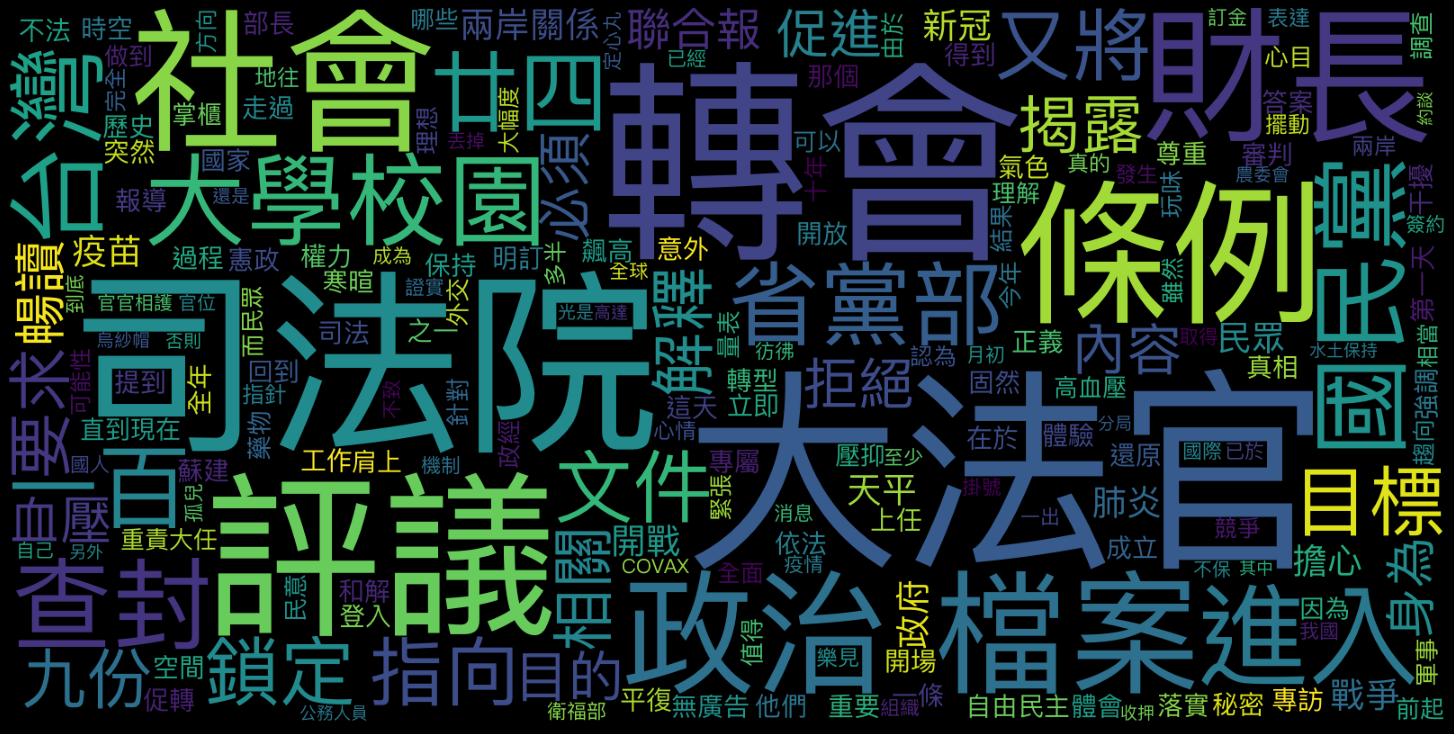

In [3]:
from collections import Counter
import imageio
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from matplotlib import pyplot as plt


## Check font paths
## !fc-list :lang=zh


## Load stopwords
with open('../../../Corpus/stopwords/tomlinNTUB-chinese-stopwords.txt') as f:
    stopwords = [w.strip() for w in f.readlines()]
    
# Create stopwords ad hoc
stopwords = set(['一個'])
wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='black',
                      #stopwords=stopwords,
                      width=1600, height=800 
                     )  ##add  system chinese font path
wordcloud.generate(' '.join([w for w in art_words if w not in stopwords]))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('../data/twp-wordcloud2.png', facecolor='k', bbox_inches='tight')



## References

- [筆記 for Python (Jieba + Wordcloud)](https://medium.com/@fsflyingsoar/%E7%AD%86%E8%A8%98-for-python-jieba-wordcloud-b814f5e04e01)

- [以 jieba 與 gensim 探索文本主題：五月天人生無限公司歌詞分析 ( I )](https://medium.com/pyladies-taiwan/%E4%BB%A5-jieba-%E8%88%87-gensim-%E6%8E%A2%E7%B4%A2%E6%96%87%E6%9C%AC%E4%B8%BB%E9%A1%8C-%E4%BA%94%E6%9C%88%E5%A4%A9%E4%BA%BA%E7%94%9F%E7%84%A1%E9%99%90%E5%85%AC%E5%8F%B8%E6%AD%8C%E8%A9%9E%E5%88%86%E6%9E%90-i-cd2147b89083)